# REFERENCE 

[1] https://deepgram.com/learn/best-python-audio-manipulation-tools

[2] https://www.geeksforgeeks.org/how-to-concatenate-audio-files-in-python/

[3] https://stackoverflow.com/questions/51826044/transition-between-audiosegment-object-and-a-wave-file-data

[4] https://www.geeksforgeeks.org/how-to-concatenate-audio-files-in-python/

[5] https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8

[6] https://www.descript.com/blog/article/crossfade-audio-what-crossfade-is-and-how-to-edit-it

[7] https://www.sweetwater.com/insync/crossfade/

[8] https://docs.python.org/3/faq/programming.html#why-am-i-getting-an-unboundlocalerror-when-the-variable-has-a-value

[9] https://www.tutorialspoint.com/How-to-find-the-nth-occurrence-of-substring-in-a-string-in-Python



# use 10 percent of Theunissen Data RANDOMLY

## Adult or Juvenile

in this part we make decision on which folder is appropreate to use, Adult data or juvenile one.

In [1]:
init_address = "C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen"

""" prompt = " Juvenile = 1 , Adult = 0"
ad_or_juven = input(prompt) """

ad_or_juven = 0 


def adult_or_juvenile(input):
    if input == 0 : 
        address = init_address + "/AdultVocalizations"
    elif input == 1 :
        address = init_address + "/ChickVocalizations"
    else :
        print("wrong input entered")
    return address 

    

## randomly select m files and move them into the new directory

I want to write a function to modulate this application, assume we have N files in specific directory, we want to make a new folder in the same directory and randomly select M files out of N (N > M) and copy the selected files into the new folder. in this function we do this.

First of all, we specify the number of M and N. N is a fixed value based on the base directory, and M is 10 percent of the 

**before this there are multiple things to do:
1. change the code in a way that can read all the audio file's formats.
1. make downloading the dataset automatic**


## what is wav files and why do we use it? [1]

There’s one well known way to represent sound - using waves. However, computers can represent that data in many ways. The most common audio data file types are .wav and .mp3. The main difference between .wav and .mp3 files is that .wav files are not compressed and .mp3 files are. This makes .wav files great for when you need the highest quality audio and .mp3 files best when you need fast streaming.

In [2]:
import os 
import random 
import shutil 
import wave


address = adult_or_juvenile(ad_or_juven) 
source_address = address

# N is the number of the files in the directory 
N = len(os.listdir(address))
# M is equal to the 10 percent of the total files
M = int(N * 0.1)

def copy_m_random_wav_files(source, m):
    
    # Get a list of all WAV files in the source directory
    wav_files = [file for file in os.listdir(source) if file.endswith(".wav")]
    
    # Randomly select m files
    selected_files = random.sample(wav_files, m)
    
        
    # Create output directory
    destination = source + "/randomly_selected_files" 
    if not os.path.exists(destination):
        os.makedirs(destination, mode=0o777)
        
    for file in selected_files: 
        source_path = os.path.join(source, file)
        destination_path = os.path.join(destination, file)
        # to avoid adding to the directory multiple times
        if len(os.listdir(destination)) < M  :
            shutil.copyfile(source_path, destination_path)
        
    print(f"Successfully copied {m} random WAV files to {destination}")
    return destination , selected_files 


destination, selected_files  = copy_m_random_wav_files(source_address, M)

destination

Successfully copied 297 random WAV files to C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/AdultVocalizations/randomly_selected_files


'C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/AdultVocalizations/randomly_selected_files'

## Preprocessing

before entering the algorithem, we need to check whether there is any dirturbed file or any file with wrong name format or not. so we check that by listing the name of the audio files in the main directory and we check if after the first "-" sign, one of the vocalization types is included. 
here is a example of some of the distribance of the output file.

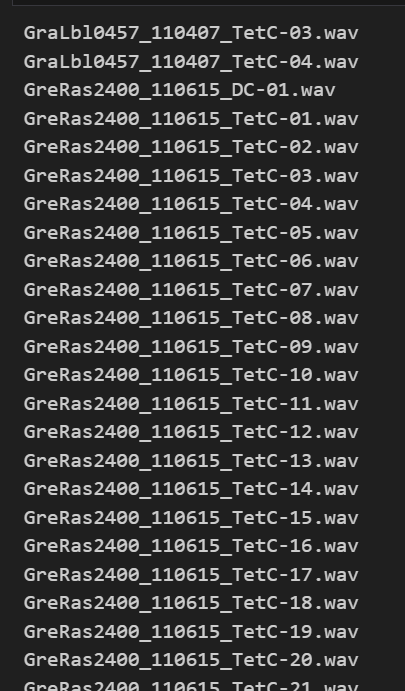

40 files have problems. 
37 of them had the problem that is mentioned in the above image. 
and 3 of them had following problem:

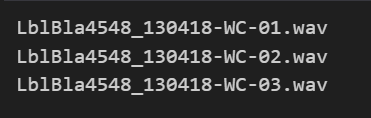

WC is not defined label. I listen to them it was whine calls and changed them manually because they we few.

In [3]:
# the function below finds takes a string and a substring as an input 
# and the nth time of something that you are looking for and it gives 
# you the index of it.
# I found it on the internet[9]
## BE CAREFUL n STARTS AT ZERO

def findnth(string, substring, n):
   parts = string.split(substring, n + 1)
   if len(parts) <= n + 1:
      return -1
   return len(string) - len(parts[-1]) - len(substring)


In [4]:
import os 

call_types = {"Ag" : "Aggressive Calls", "Be" : "Begging Calls",
              "DC" : "Distance Calls", "Di" : "Distress Calls",
              "LT" : "Long Tonal Call", "Ne" : "Nest Calls",
              "So" : "Song", "Te" : "Tet Calls",
              "Th" : "Thuck Calls", "Tu" : "Tuck Calls", "Wh" : "Whine Calls"}

files = os.listdir(address)
counter = 0 
try: 
    for file in files: 
        if file.endswith("wav") and bool(file.count("-")):
            hyphen_index = file.index('-')
            VT = str(f"{file[hyphen_index + 1]}") + str(f"{file[hyphen_index + 2]}")
            if VT not in call_types:
                counter += 1 
                if file.count("_") > 1 :
                    old = address + str(f"/{file}") 
                    index_of_Second_underline = findnth(file, "_", 1)
                    file = file[:index_of_Second_underline -1]  +  "-" + file[index_of_Second_underline +1 : ] 
                    new = address + str(f"/{file}")
                    os.rename(old, new)
                    
                else : 
                    print(file)
                    
                    
except :
    print("following file needs some manually changes") 
    print(file)

counter 

0

## add different wav files to each other in python(Concatinate Audio Files)
[2][3][4]

In the following part, we used "merge_m_wave_files" function to merge m different wave files to eachother, to implement this idea we first read each audio file then we add it to a predifined audio file which is initially empty, using append function. 
append has a few parameters one of them is **crossfade** 

- what is crossfade? 
  
Crossfading is an audio editing technique that creates a smooth transition between two audio clips. When you crossfade audio, you make one audio clip fade out as the next clip simultaneously fades in.[6] so in here we set the value zero. 


## Add noise to the accumulated Audio file

We describe 2 types of noises that can be added to audio data

* Additive White Gaussian Noise (AWGN)
* Real world noises
[5]



In [5]:
import numpy as np 
import array
from pydub import AudioSegment
from pydub.playback import play 
from scipy.io.wavfile import read
from scipy.io.wavfile import write 
import matplotlib.pyplot as plt
import os
import silence
import io 
import scipy.io.wavfile
import scipy.io 
from scipy.io import wavfile 


c:\Users\t_mor\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# -------------------------------------------
# implement using PYDUB 
# -------------------------------------------


I tried to write this programe as modular as possible, hence I did not define anything database-dependent so far. Now I want to bring the dataset. 
if __name__ == "main"


the point is I tried to implement this using another module named pydub but it did not work bc the access in this was very limited.

In [27]:
file_names = os.listdir(destination)
file_path = destination + str('/log.txt')
# define an empty audio file [3]
accumulated_audio = AudioSegment.empty()

# parameters to know whether we want to add noise or silence
# you can take it from user **
add_silence = 0
add_white_noise = 0 
add_env_noise = 1

# add the detail about size and length of audio file
starts_from = 0
audio_duration = 0 
Ends_at = 0 

# it has to be taken from output
snr_dB = 1 # The desired SNR level in dB

noise_add = "C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/noise/OOFFICE/audiocheck.net_bluenoise.wav"
destination = "C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/AdultVocalizations/randomly_selected_files"

I used z-score to nomalized values, we need to normalize them otherwise we face error because of the large values we have.
we take the input, no matter what data structure it has, we turn it into a numpy array to ease calculations. 

In [7]:
from pydub import AudioSegment
import numpy as np
import math 

def z_normalization(input):
        input = np.array(input)
        input_mean = np.mean(input)
        input_std = np.std(input)
        input = abs((input - input_mean)) / (input_std)
        return input



def get_noise(signal, noise , snr_dB):
        signal_power = math.sqrt(np.sum( signal ** 2 ))
        noise_power = math.sqrt(np.sum(noise ** 2))
        factor = (signal_power / noise_power) * (10 ** (-(snr_dB / 20)))
        noise = noise * factor
        return noise 
        


In [8]:

try:   
    with open(file_path, 'w') as text_file:
    
        text_file.write("File Name" + " | " +  "Call Type" + " | " + "starts from" + " | " + "Ends at" + "\n" +"\n"  ) 
        for file in file_names:
            if file.endswith("wav") and "-" in file:
                    
                ## start audio concatination 
                wav_path = destination + str(f"/{file}")
                audio = AudioSegment.from_wav(wav_path)
                accumulated_audio = accumulated_audio.append(audio , crossfade=0)
                duration = audio.duration_seconds 
                Ends_at = starts_from + duration
                # end audio concatination 

                # start writing about the audio file concatinated
                hyphen_index = file.index('-')
                VT = str(f"{file[hyphen_index + 1]}") + str(f"{file[hyphen_index + 2]}")
                text_file.write( file + " | " + call_types[VT] + " | " + str(starts_from)  + " | " + str(Ends_at) +"\n" ) 
                # end writing about the audio file concatinated
                
                
                # start adding silence to accumulated_audio
                if add_silence == 1 : 
                    starts_from = Ends_at
                    # in qesmat ro inja ezafe mikonam vali byd be on for e ezafe koni
                    silence_segment = AudioSegment.silent(2000)
                    accumulated_audio = accumulated_audio.append(silence_segment, crossfade=0)
                    Ends_at = starts_from + duration 
                    text_file.write( "Silence" + " | " + str(starts_from)  + " | " + str(Ends_at) +"\n" )
                    starts_from = Ends_at
                    
                else: 
                    #print("neither noise nor  silence added to the main file")
                    starts_from = Ends_at
                # end adding silence to accumulated_audio
                
        # export the version that is accumulated data and silence
        dest_path = destination  + "/accumulated_audio.wav"
        accumulated_audio.export(dest_path, format='wav' )
        rate = accumulated_audio.frame_rate
 
        
        """         # read noise file as pydub attribute
        noise = AudioSegment.from_wav(noise_add)
        noisy = accumulated_audio.overlay(noise) 
        path_noise = destination + "/noisy.wav"
        noisy.export(path_noise, format='wav' ) """
        
        
        
        # add noise 
        if add_white_noise == 1: 
             pass
        
        elif add_env_noise == 1: 
             # Load the audio files
            audio_signal = accumulated_audio
            noise = AudioSegment.from_wav(noise_add)

            # Convert the audio to numpy arrays
            signal_array = np.array(audio_signal.get_array_of_samples())
            noise_array = np.array(noise.get_array_of_samples())
            
            signal_array = z_normalization(signal_array)
            noise_array = z_normalization(noise_array)


            
            if(len(noise_array)>len(signal_array)):
                noise_array=noise_array[0:len(audio_signal)]
            
            if (len(noise_array) < len(signal_array)):
                number_of_repetition = int(len(signal_array) // len(noise_array))
                noise_array = np.tile(noise_array, number_of_repetition)
                noise_array = np.resize(noise_array, len(signal_array))

            #signal_array = signal_array.astype(np.float32)
            #noise_array = noise_array.astype(np.float32)

            #source_noise =AudioSegment.empty()
            
            adjusted_noise = get_noise(signal_array,noise_array,snr_dB)
            
            #source_noise = array.array(noise.array_type , adjusted_noise)
            channel_sounds = noise.split_to_mono()
            samples = [s.get_array_of_samples() for s in channel_sounds]
            
            fp_arr = np.array(samples).T.astype(np.float64)
            fp_arr /= np.iinfo(samples[0].typecode).max
            
            wav_io = io.BytesIO()
            scipy.io.wavfile.write(wav_io, 16000, fp_arr)
            wav_io.seek(0)
            print(type(wav_io))
            
            """
            AudioSegment_noise = AudioSegment.from_wav(wav_io)
            
            noisy_signal = audio_signal + AudioSegment_noise
            

            # Export the result as a new WAV file
            noise_path = destination + "/env_noise_audio.wav"
            noisy_signal.export(noise_path, format="wav")
            text_file.write( "Enviroment Noise" + " | " + "SNR(dB)"  + " | " +  f"{snr_dB}" +"\n" ) """ 
            

            
            
                

except KeyError:
    print("you got problem")     
 
""" plt.plot(signal_array + noise)   
plt.plot(signal_array)    
plt.plot(noise) 
plt.show()     """ 

<class '_io.BytesIO'>


' plt.plot(signal_array + noise)   \nplt.plot(signal_array)    \nplt.plot(noise) \nplt.show()     '

# -------------------------------------------------------
# implemening the same thing using scipy.io.wavfile
# -------------------------------------------------------

i first compared these scipy and pydub. 
After struggling long time with arrays in python I came to the conclusion that scipy.io.wavfile is a better library to use for this application since it entails arrays and I need more access to deeper level of handing number and pydub is more abstract and has underlying complexity. 

In order to compare these two I used chatGPT for broader view. 

Functionality:

scipy.io.wavfile:
scipy.io.wavfile is part of the SciPy library and provides functions for reading and writing WAV (Waveform Audio File Format) files. It's a sub-module of SciPy, which is a broader scientific computing library. It's primarily focused on handling WAV files and dealing with audio data in a low-level manner, including reading audio samples and their sampling rate from WAV files.

pydub:
pydub is a high-level audio processing library that abstracts away many of the complexities of working with audio files. It supports a wide variety of audio formats, not just WAV. Pydub provides a more convenient and high-level API for audio manipulation tasks, such as splitting, concatenating, changing formats, adjusting volume, applying effects, and more.

Use Cases:

scipy.io.wavfile:
Use scipy.io.wavfile when you need to specifically work with WAV files and you require low-level access to audio data. It's useful for tasks like reading audio data into numpy arrays, performing mathematical operations on the audio data, and writing the modified data back to WAV files. If your focus is on scientific computing and signal processing, and you're working primarily with WAV files, this is a suitable choice.

pydub:
Use pydub when you need to perform various audio processing tasks without getting into the nitty-gritty details of audio file formats and low-level data manipulation. It's great for tasks like audio format conversion, basic editing, applying effects, and quickly prototyping audio-related functionality. It provides a more user-friendly and intuitive interface for these tasks.

Ease of Use:

scipy.io.wavfile:
This library requires a bit more understanding of audio file formats and signal processing concepts. You'll need to work with numpy arrays to manipulate the audio data.

pydub:
Pydub abstracts much of the underlying complexity, making it relatively easier to work with audio files. It's designed to be more user-friendly, especially for users who might not have an in-depth understanding of audio formats.

In summary, if you're primarily working with WAV files and want to handle them at a lower level with a focus on signal processing, scipy.io.wavfile is a good choice. On the other hand, if you need a more high-level and user-friendly approach for a variety of audio processing tasks, pydub is a better option. Your choice should depend on your specific use case and your level of familiarity with audio processing concepts.

# 1. read a simple audio file using SciPy.io.wavfile

in this part, I plot the noise and accumulated data that I created in previous part seperately in right and left channel, we can see the length and amplitude of each in the following plot. 

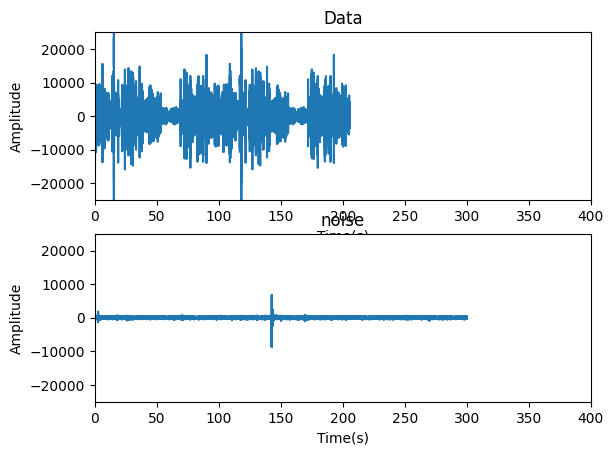

In [6]:
import scipy.io 
from scipy.io import wavfile 
import matplotlib.pyplot as plt 
import numpy as np 



noise_add = "C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/noise/OOFFICE/audiocheck.net_bluenoise.wav"
#destination = "C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/AdultVocalizations/randomly_selected_files"


# data directory
data_dir = "C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/AdultVocalizations/randomly_selected_files"
datapath = data_dir + "/accumulated_audio_using_scipy.wav"
data_samplerate , data = wavfile.read(datapath)

# plot the data waveform
data_length = data.shape[0] / data_samplerate
time = np.linspace(0., data_length, data.shape[0])
plt.subplot(2,1,1)
plt.plot(time, data[:, ])
plt.title("Data")
plt.xlabel("Time(s)")
plt.xlim(0 , 400)
plt.ylim( -25000 , 25000)
plt.ylabel("Amplitude")


# noise directory
noise_dir = "C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/noise/OOFFICE"
noisepath = noise_dir + "/ch01.wav"
noise_samplerate , noise = wavfile.read(noisepath)


# plot the noise waveform
noise_length = len(noise) / noise_samplerate
time = np.linspace(0., noise_length, len(noise))
plt.subplot(2,1,2)
plt.plot(time, noise)
plt.title("noise")
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.xlim(0 , 400)
plt.ylim( -25000 , 25000)
plt.show() 



# add noise to accumulated data 

In [7]:
import numpy as np 
import array
from pydub import AudioSegment
from pydub.playback import play 
from scipy.io.wavfile import read
from scipy.io.wavfile import write 
import matplotlib.pyplot as plt
import os
import silence
import io 
import scipy.io.wavfile
import scipy.io 
from scipy.io import wavfile 

In [8]:
# parameters 
silent_seconds = 2


import os 
from scipy.io.wavfile import write


noise_add = "C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/noise/OOFFICE/audiocheck.net_bluenoise.wav"
destination = "C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/AdultVocalizations/randomly_selected_files"


call_types = {"Ag" : "Aggressive Calls", "Be" : "Begging Calls",
              "DC" : "Distance Calls", "Di" : "Distress Calls",
              "LT" : "Long Tonal Call", "Ne" : "Nest Calls",
              "So" : "Song", "Te" : "Tet Calls",
              "Th" : "Thuck Calls", "Tu" : "Tuck Calls", "Wh" : "Whine Calls"}

file_names = os.listdir(destination)
file_path = destination + str('/log.txt')
# define an empty audio file [3]

# parameters to know whether we want to add noise or silence
# you can take it from user **
add_silence = 0
add_white_noise = 1
add_env_noise = 0

# add the detail about size and length of audio file
starts_from = 0
audio_duration = 0 
Ends_at = 0 

# it has to be taken from output
snr_dB = -50 # The desired SNR level in dB


# accumulated_audio initialization
accumulated_audio = np.array([])
accumulated_audio_with_silence = np.array([])

In [9]:
file_names = os.listdir(destination)
file_path = destination + str('/log.txt')
# define an empty audio file [3]
accumulated_audio = AudioSegment.empty()

# parameters to know whether we want to add noise or silence
# you can take it from user **
add_silence = 1
add_white_noise = 0 
add_env_noise = 0

# add the detail about size and length of audio file
starts_from = 0
audio_duration = 0 
Ends_at = 0 

# it has to be taken from output
snr_dB = 20 # The desired SNR level in dB

noise_add = "C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/noise/OOFFICE/audiocheck.net_bluenoise.wav"
destination = "C:/My_Document/University_Courses/papers/IPM-started@Tir25th/python-code/Theunissen/AdultVocalizations/randomly_selected_files"

In [10]:
from pydub import AudioSegment
import numpy as np
import math 

def z_normalization(input):
        input = np.array(input)
        input_mean = np.mean(input)
        input_std = np.std(input)
        input = abs((input - input_mean)) / (input_std)
        return input , input_mean , input_std

def inverse_z_normalization(normalized_data , input_mean, input_std):
        data = (normalized_data * input_std) + input_mean
        return data 
def get_white_noise(signal , snr_dB):
        noise = np.random.normal(0, 1, len(signal))
        
        # Calculate the energy of the original signal
        signal_energy = np.sum(abs(signal ** 2))
        
        # Calculate the desired noise energy based on SNR
        
        desired_noise_energy = signal_energy / (10 ** (snr_dB / 20))

        # Calculate the scaling factor for the noise
        scaling_factor = np.sqrt(desired_noise_energy / np.sum(abs(noise ** 2)))
        scaled_noise = scaling_factor * noise

        
        # Add noise to the original signal
        # noisy_signal = signal  + scaled_noise
        
        return scaled_noise
        
def get_env_noise(signal, noise , snr_dB):
        # Calculate the energy of the original signal
        signal_energy = np.sum(abs(signal ** 2))
        
        # Calculate the desired noise energy based on SNR
        
        desired_noise_energy = signal_energy / (10 ** (snr_dB / 20))

        # Calculate the scaling factor for the noise
        scaling_factor = np.sqrt(desired_noise_energy / np.sum(abs(noise ** 2)))
        scaled_noise = scaling_factor * noise

        # Add noise to the original signal
        # noisy_signal = signal  + scaled_noise
        
        return scaled_noise
         
        


 to add silenc, I tried np.pad in python but it did not work properly[or maybe in my imeplementation] so I used adding zero elements.

In [11]:
try:   
    with open(file_path, 'w') as text_file:
    
        text_file.write("File Name" + " | " +  "Call Type" + " | " + "starts from" + " | " + "Ends at" + "\n" +"\n"  ) 
        for file in file_names:
            if file.endswith("wav") and "-" in file:
                    
                ## start audio concatination 
                wav_path = destination + str(f"/{file}")
                audio_samplerate , audio = wavfile.read(wav_path)
                #audio  = audio.astype(np.int16)
                
                # select one channel of two
                audio = audio[:, 0]
                
                accumulated_audio = np.concatenate((accumulated_audio, audio), axis= 0 )
                
                
                
                duration = len(audio) / audio_samplerate
                #duration = audio.duration_seconds 
                Ends_at = starts_from + duration
                # end audio concatination 

                # start writing about the audio file concatinated
                hyphen_index = file.index('-')
                VT = str(f"{file[hyphen_index + 1]}") + str(f"{file[hyphen_index + 2]}")
                text_file.write( file + " | " + call_types[VT] + " | " + str(starts_from)  + " | " + str(Ends_at) +"\n" ) 
                # end writing about the audio file concatinated
                
                
                # start adding silence to accumulated_audio
                if add_silence == 1 :  
                    starts_from = Ends_at
                    number_of_samples = silent_seconds * audio_samplerate
                    #np.pad(accumulated_audio, (0, number_of_samples), mode = "constant")
                    
                    # create zero element to work as silence
                    silence = np.zeros([number_of_samples,], dtype=np.int16)
                    # add silence to the audio file. 
                    accumulated_audio = np.concatenate((accumulated_audio , silence))
                    
                    Ends_at = starts_from + silent_seconds 
                    text_file.write( "Silence" + " | " + str(starts_from)  + " | " + str(Ends_at) +"\n" )
                    starts_from = Ends_at
                    accumulated_audio_with_silence = accumulated_audio
                else: 
                    #print("neither noise nor silence added to the main file")
                    starts_from = Ends_at
                # end adding silence to accumulated_audio
                
        # save file with silence
        if len(accumulated_audio_with_silence) > 0 : 
            dest_path_4_Silence = destination + "/accumulated_audio_using_scipy_with_silence.wav"
            write(dest_path_4_Silence, audio_samplerate , accumulated_audio_with_silence.astype(np.int16))
            print("you requested for silence added signal ")
            data_to_show = accumulated_audio_with_silence
        
        # if there is no silence added save source file   
        else: 
            # export the version that is accumulated data
            dest_path = destination  + "/accumulated_audio_using_scipy.wav"
            write(dest_path, audio_samplerate , accumulated_audio.astype(np.int16))
            print("you did not add either noise nor silence")
            data_to_show = accumulated_audio

        
        # add noise 
        if add_white_noise == 1:
            signal_array = accumulated_audio 
            # make noise signal in a way that satisfies given SNR
            adjusted_noise = get_white_noise(signal_array,snr_dB)
            
            # amplify numbers 
            #signal_array = inverse_z_normalization(signal_array, signal_array_mean, signal_array_std)
            #adjusted_noise = inverse_z_normalization(adjusted_noise , noise_array_mean, noise_array_std)
            noisy_signal = signal_array  + adjusted_noise
            
            # export the merged audio file + noise
            dest_path_4_white_noise = destination  + f"/accumulated_audio_using_scipy_with_white_noise_SNR{snr_dB}.wav"
            write(dest_path_4_white_noise, audio_samplerate ,noisy_signal.astype(np.int16))
            print("you requested for white noise added signal ")
            data_to_show = noisy_signal
            
        
        elif add_env_noise == 1: 
            # Load the audio files
            signal_array = accumulated_audio
            noise_array = noise 
            
            if(len(noise_array)>len(signal_array)):
                noise_array=noise_array[0:len(audio_signal)]
            
            if (len(noise_array) < len(signal_array)):
                number_of_repetition = int(len(signal_array) // len(noise_array))
                noise_array = np.tile(noise_array, number_of_repetition)
                noise_array = np.resize(noise_array, len(signal_array))


            
            # make noise signal in a way that satisfies given SNR
            adjusted_noise = get_env_noise(signal_array,noise_array,snr_dB)
            noisy_signal = signal_array  +  adjusted_noise
            
            
            # export the merged audio file + noise
            dest_path_4_envnoise = destination  + f"/accumulated_audio_using_scipy_with_env_noise_SNR{snr_dB}.wav"
            write(dest_path_4_envnoise, audio_samplerate , noisy_signal.astype(np.int16))
            print("you requested for enviroment noise added signal ")
            data_to_show = noisy_signal
            
   

except KeyError:
    print("you got problem")   



you requested for silence added signal 


In [35]:
import os

os.getcwd()

'c:\\My_Document\\University_Courses\\papers\\IPM-started@Tir25th\\python-code\\IPM_virtualEnviroment'

## ----------------------------------------------
##  Show the spectrogram of added noise signal
## ----------------------------------------------

Text(0, 0.5, 'Amplitude')

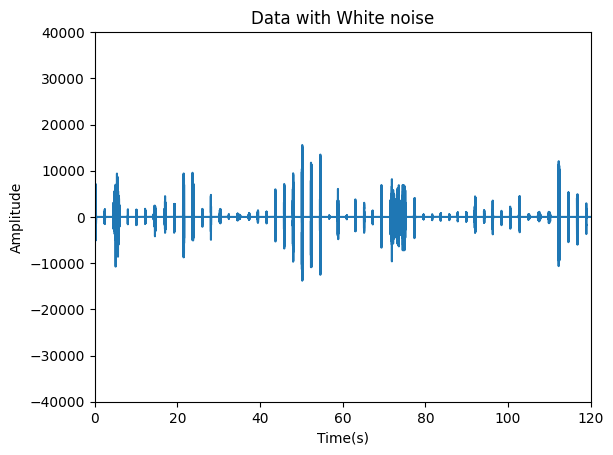

In [12]:
# data directory
data = data_to_show

# plot the data waveform
data_length = data.shape[0] / data_samplerate
time = np.linspace(0., data_length, data.shape[0])
plt.plot(time, data[:, ])
plt.title("Data with White noise")
plt.xlabel("Time(s)")
plt.xlim(0 , 120)
plt.ylim( -40000 , 40000)
plt.ylabel("Amplitude")



## ----------------------------------------------
##  calculate Fourier Tansform
## ----------------------------------------------

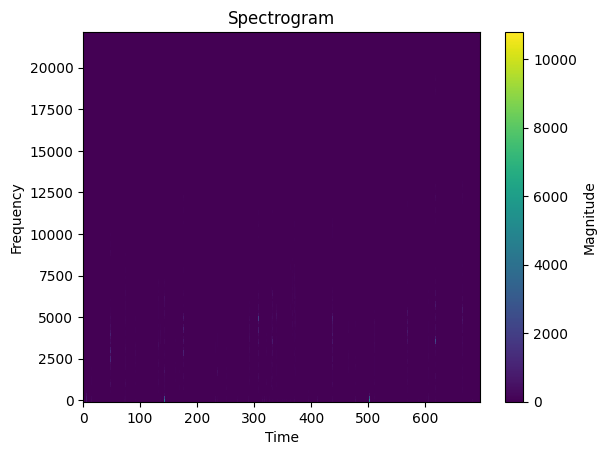

In [13]:
from scipy.signal import stft

# Set the parameters for STFT
fs = 44100  # Sampling frequency
nperseg = 256  # Number of samples per segment
noverlap = 128  # Number of overlapping samples

# Calculate the STFT
f, t, Zxx = stft(data, fs=fs, nperseg=nperseg, noverlap=noverlap)

# f: Array of sample frequencies
# t: Array of segment times
# Zxx: 2D array of complex STFT coefficients

# You can access the magnitude of the STFT coefficients using np.abs(Zxx)
magnitude = np.abs(Zxx)


plt.pcolormesh(t, f, magnitude)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar(label='Magnitude')
plt.title('Spectrogram')
plt.show()

Before we go through this stage, we need to do the annotation. One of the avaliable tools is TweetyNet. 
in the following line, we try to install it.

In [16]:
!pip install tweetynet 

     ---------------------------------------- 0.0/145.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/145.4 kB ? eta -:--:--
     ------- ----------------------------- 30.7/145.4 kB 435.7 kB/s eta 0:00:01
     ------- ----------------------------- 30.7/145.4 kB 435.7 kB/s eta 0:00:01
     ---------- -------------------------- 41.0/145.4 kB 196.9 kB/s eta 0:00:01
     --------------- --------------------- 61.4/145.4 kB 252.2 kB/s eta 0:00:01
     ------------------ ------------------ 71.7/145.4 kB 262.6 kB/s eta 0:00:01
     --------------------------- -------- 112.6/145.4 kB 344.8 kB/s eta 0:00:01
     ------------------------------ ----- 122.9/145.4 kB 343.4 kB/s eta 0:00:01
     ------------------------------------ 145.4/145.4 kB 360.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.2 MB 991.0 kB/s eta 0:00:02
     -- ------------------------------------- 0.1/1.2 MB 1.1 M


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


After studying this paper : 
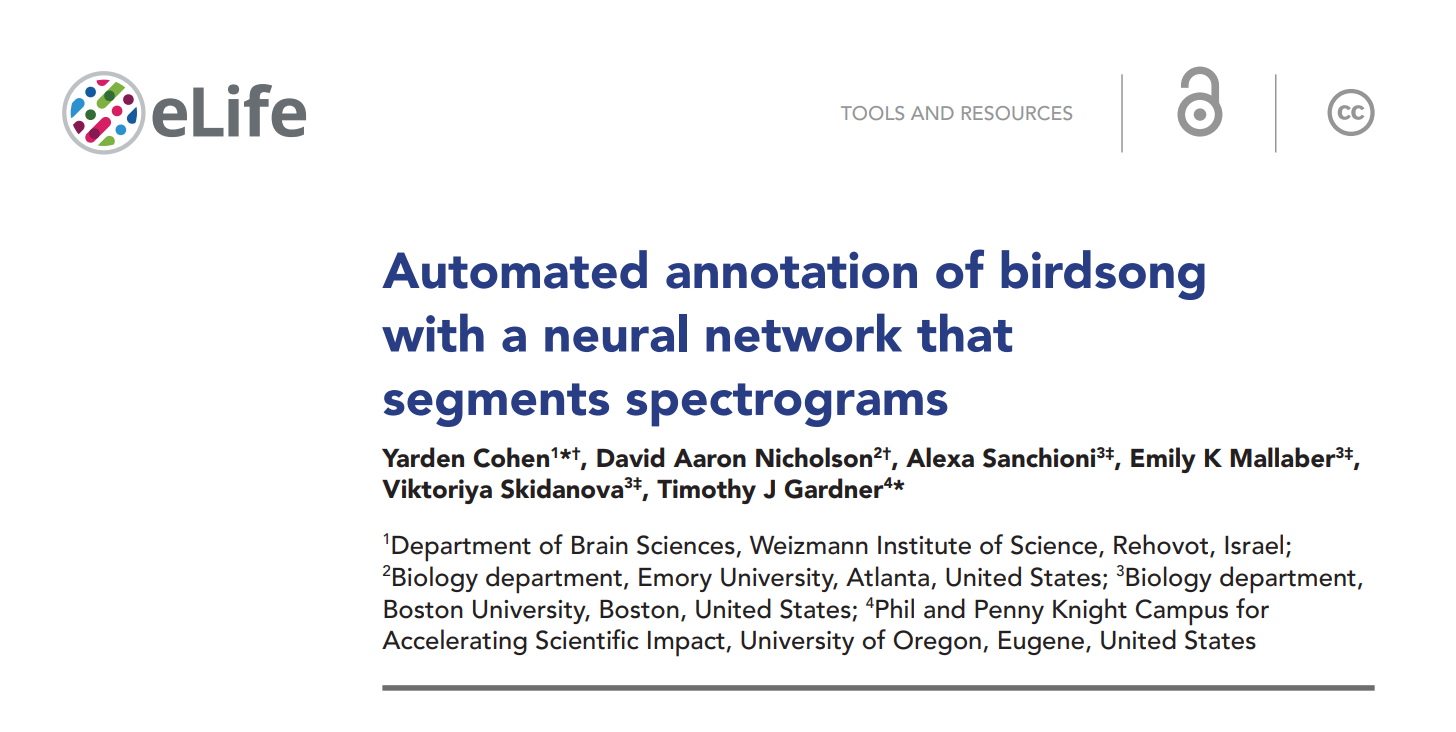

name : Automated annotation of birdsong 
with a neural network that 
segments spectrograms

I found out that there are some automatic tools to apply for annotations, but in this paper first they employed the manual annotation and then they used TweetyNet to automate the process. For manual annotation I used prodigy. 

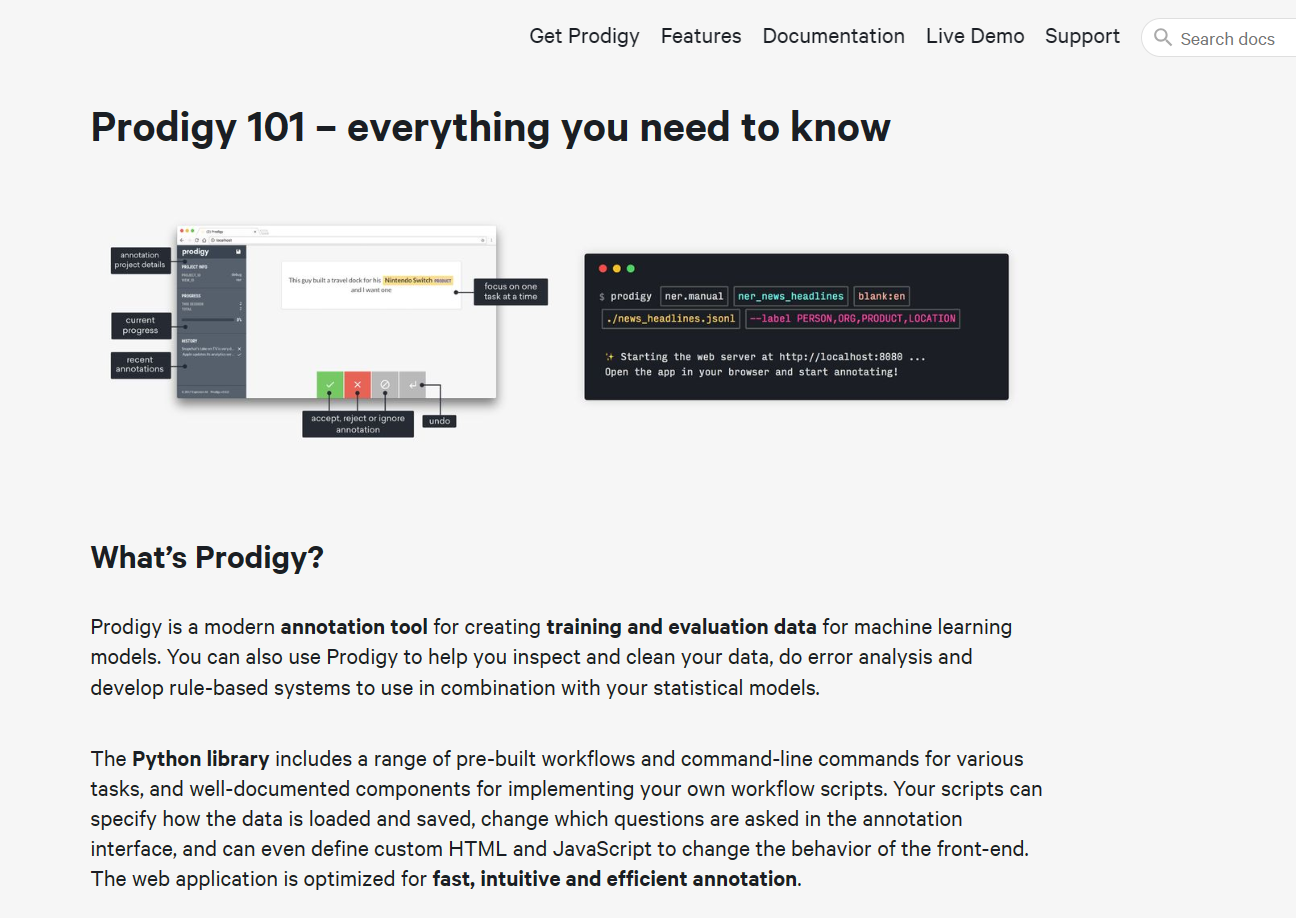
https://prodi.gy/docs

it was not free, so excluded :) 

the last thing you have tried was Audacity
and next time ask khademian about how to do the manual annotation, and report that there is an available paper that has used automatic annotation.

## ----------------------------------------------
##  Feature Extraction using PCA
## ----------------------------------------------

In [18]:
data.shape

(30727070,)

In [ ]:
in nashod bia rosh dafe bad

In [19]:
import numpy as np
from sklearn.decomposition import PCA

# Reshape the 1D data into a 2D array (100 samples, 1 feature)
data_2d = data.reshape(-1, 1)
# Initialize the PCA model
num_components = 1  # Number of components you want to extract
pca = PCA(n_components=num_components)

# Fit the PCA model to your data and transform the data
transformed_data = pca.fit_transform(data_2d)

# The transformed_data now contains the extracted features
print(transformed_data.shape)  # (100, 10)

(30727070, 1)
